# Import Libraries

In [1]:
import time
import random
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler   # same as preprocessing.scale(data)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from urllib.request import urlopen 
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

In [2]:
from geopy import distance

# Importing Data

In [3]:
df = pd.read_csv('Data/YourCabs.csv')
df.head(5)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [4]:
# Dropping Target columns
data = df.drop(['Car_Cancellation','Cost_of_error'],axis=1) 

In [5]:
# Set aside the Target Column
target = df[['Car_Cancellation']]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

# Missing Values Check & Treatment

In [7]:
# Check for Missing Data

total = data.isnull().sum()
percent = (data.isnull().sum() * 100 / data.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing Values', 'Percentage of Missing Values'])
missing_data

# Insight: 4 Columns have missing values.

,Total Missing Values,Percentage of Missing Values
id,0,0.000000
user_id,0,0.000000
vehicle_model_id,0,0.000000
package_id,35881,82.616104
travel_type_id,0,0.000000
from_area_id,88,0.202620
to_area_id,9138,21.040271
from_city_id,27086,62.365591
to_city_id,41843,96.343626
from_date,0,0.000000


# Data Cleaning

In [8]:
# Dropping Identity columns
# Dropping on null value percentage > 40
# Dropping to_area_id as it is of no scope

data=data.drop(['id','user_id','package_id','to_area_id','from_city_id','to_city_id','to_date'],axis=1)


In [9]:
data['vehicle_model_id'].value_counts(normalize=True)*100

12    73.355437
85     5.542124
89     5.505284
65     4.402385
28     3.918860
24     3.439939
87     1.300914
90     0.718381
23     0.683843
86     0.283208
10     0.239460
64     0.195713
54     0.168083
17     0.092100
91     0.057563
30     0.032235
36     0.020723
13     0.016118
72     0.004605
1      0.004605
43     0.004605
14     0.002303
69     0.002303
76     0.002303
75     0.002303
70     0.002303
39     0.002303
Name: vehicle_model_id, dtype: float64

In [10]:
# Dropping 'vehicle_model_id' as single value has more weightage compared to remaining
data=data.drop(['vehicle_model_id'],axis=1) 
data.head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,2,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750
1,2,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640
2,2,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766
3,2,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140
4,2,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720


# Data Transforming

In [11]:
# Print the max value of 'from_area_id' that corresponds to the median value of 'from_lat'
print(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max())

# Print the median value of 'from_lat'
print(data['from_lat'].median())

# Print the median value of 'from_long'
print(data['from_long'].median())

1044.0
12.968887
77.63575


In [12]:
# Impute NaN Values in 'from_lat' with the median value of 'from_lat'
data['from_lat'] = data['from_lat'].fillna(data['from_lat'].median())

# Impute NaN Values in 'from_long' with the median value of 'from_long'
data['from_long'] = data['from_long'].fillna(data['from_long'].median())

In [13]:
# Impute NaN Values in 'from_area_id' with the max value of 'from_area_id' that corresponds to the median value of 'from_lat'
# We cannot take median of 'from_area_id' as it is a discrete variable.
data['from_area_id'] = data['from_area_id'].fillna(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max())

In [14]:
# Fill NaN Values with median for Continuous data and mode for Discrete data
data['to_lat'] = data['to_lat'].fillna(df.groupby('from_area_id')['to_lat'].transform('median'))
data['to_long'] = data['to_long'].fillna(df.groupby('from_area_id')['to_long'].transform('median'))

In [15]:
data[data['to_lat'].isnull()].head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
2158,1,483.0,1/25/2013 6:00,1,0,1/24/2013 15:32,12.953020,77.56333,NaN,NaN
3945,1,1397.0,2/10/2013 16:30,1,0,2/10/2013 13:26,12.968887,77.63575,NaN,NaN
4912,1,1397.0,2/23/2013 6:30,1,0,2/19/2013 21:29,12.968887,77.63575,NaN,NaN
5144,1,1397.0,2/22/2013 13:30,1,0,2/22/2013 10:22,12.968887,77.63575,NaN,NaN
5970,1,1397.0,3/4/2013 7:00,0,0,3/2/2013 17:48,12.968887,77.63575,NaN,NaN


In [16]:
data[data['to_lat'].isnull()]['from_area_id'].value_counts()

1397.0    90
1396.0     3
173.0      2
17.0       2
483.0      1
1215.0     1
1265.0     1
215.0      1
1080.0     1
802.0      1
1164.0     1
178.0      1
Name: from_area_id, dtype: int64

In [17]:
# Check Median Values of 'to_lat' and 'to_long' columns:
print(data['to_lat'].median())
print(data['to_long'].median())

12.98999
77.649047


In [18]:
# Fill NaN values in 'to_lat' and 'to_long' with median values:
data['to_lat'] = data['to_lat'].fillna(data['to_lat'].median())
data['to_long'] = data['to_long'].fillna(data['to_long'].median())

In [19]:
data[data['from_area_id']==571.0].head(10)

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
6,1,571.0,1/1/2013 9:45,0,0,1/1/2013 9:21,12.95185,77.69642,12.986284,77.65530
43,2,571.0,1/2/2013 3:00,0,0,1/1/2013 19:00,12.95185,77.69642,13.199560,77.70688
78,2,571.0,1/3/2013 17:15,1,0,1/2/2013 9:31,12.95185,77.69642,13.199560,77.70688
156,2,571.0,1/4/2013 8:00,0,0,1/3/2013 10:29,12.95185,77.69642,13.028530,77.54625
159,2,571.0,1/4/2013 4:45,1,0,1/3/2013 13:00,12.95185,77.69642,12.976770,77.57270
212,3,571.0,1/4/2013 13:15,0,0,1/4/2013 8:36,12.95185,77.69642,12.986284,77.65530
225,2,571.0,1/4/2013 13:30,0,0,1/4/2013 10:32,12.95185,77.69642,13.199560,77.70688
261,2,571.0,1/4/2013 22:00,0,0,1/4/2013 18:07,12.95185,77.69642,12.907960,77.62418
278,3,571.0,1/5/2013 10:00,0,0,1/4/2013 20:19,12.95185,77.69642,12.986284,77.65530
297,2,571.0,1/5/2013 10:30,0,0,1/5/2013 8:59,12.95185,77.69642,13.022390,77.59492


In [20]:
# Check for Missing Data again

total = data.isnull().sum()
percent = (data.isnull().sum() * 100 / data.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing Values', 'Percentage of Missing Values'])
missing_data

# Insight: No more missing data

,Total Missing Values,Percentage of Missing Values
travel_type_id,0,0.0
from_area_id,0,0.0
from_date,0,0.0
online_booking,0,0.0
mobile_site_booking,0,0.0
booking_created,0,0.0
from_lat,0,0.0
from_long,0,0.0
to_lat,0,0.0
to_long,0,0.0


In [21]:
data.head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,2,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750
1,2,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640
2,2,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766
3,2,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140
4,2,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720


In [22]:
# # 'travel_type_id' column has 3 values - 1=long distance, 2= point to point, 3= hourly rental. Split them into 3 columns:

# traveltype = pd.get_dummies(data['travel_type_id'])
# #One Hot Encoding if number of distinct values is more than 5
# #Label Encoding if number of distinct values is less than 5
# traveltype

In [23]:
# # Concatenate the 3 new columns to the dataframe and drop the original column 'travel_type_id':
# data = pd.concat([data,traveltype],axis=1)
# data = data.drop(['travel_type_id'],axis=1)

In [24]:
# data.rename(columns={1:'long_distance', 2:'traveltype_pointtopoint', 3:'traveltype_hourly'},inplace=True)

In [25]:
# Function to calculate distance based on Latitude / Longitude Data:
def cal_distance(from_lat,from_long,to_lat,to_long):
  return distance.distance((from_lat,from_long),(to_lat,to_long)).km

data['distance'] = data.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)

In [26]:
# Verify if any of the distances calculated based on Latitude / Longitude data < 0 as Negative values means error
data[data['distance'] < 0]

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,distance


In [27]:
data

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,distance
0,2,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,3.980687
1,2,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,14.004432
2,2,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,12.648909
3,2,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,9.534596
4,2,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,14.655467
...,...,...,...,...,...,...,...,...,...,...,...
43426,2,1147.0,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,10.681284
43427,2,393.0,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,21.251031
43428,3,974.0,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,13.022390,77.601190,7.450810
43429,2,1263.0,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,4.584142


In [28]:
# Drop the latitude / Longitude columns as we have converted them to distance:
data = data.drop(['from_lat','from_long','to_lat','to_long'],axis=1)

In [29]:
# Format the Date Time columns to true Date Time using String Formatting

data['from_date_dt'] = pd.to_datetime(data['from_date']).dt.strftime('%m/%d/%Y')
data['from_time_tm'] = pd.to_datetime(data['from_date']).dt.strftime('%H:%M')
data['booking_created_dt'] = pd.to_datetime(data['booking_created']).dt.strftime('%m/%d/%Y')
data['booking_created_tm'] = pd.to_datetime(data['booking_created']).dt.strftime('%H:%M')

In [30]:
# Extract Day from 'from_date_dt':
data['from_date_day'] = pd.to_datetime(data['from_date_dt']).dt.day_name()

# Extract Day from 'booking_created_dt':
data['booking_created_day'] = pd.to_datetime(data['booking_created_dt']).dt.day_name()

# Extract Month from 'from_date_dt'
data['from_date_month'] = pd.to_datetime(data['from_date_dt']).dt.month_name()

# Extract Month from 'booking_created_dt':
data['booking_created_month'] = pd.to_datetime(data['booking_created_dt']).dt.month_name()

# Extract Weekday / Weekend information from 'from_date_day'
data['from_date_week'] = np.where((data['from_date_day']=='Saturday') | (data['from_date_day']=='Sunday'),'Weekend','Weekday',)

# Extract Weekday / Weekend information from 'booking_created_day'
data['booking_created_week'] = np.where((data['booking_created_day']=='Saturday') | (data['booking_created_day']=='Sunday'),'Weekend','Weekday',)

In [31]:
# Bin the trip start time into ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
cond = [(pd.to_datetime(data['from_time_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['from_time_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['from_time_tm']).dt.hour==0)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['from_date_session'] = np.select(cond,values)

In [32]:
# Bin the Booking time into ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
cond = [(pd.to_datetime(data['booking_created_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['booking_created_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['booking_created_tm']).dt.hour==0)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['booking_created_session'] = np.select(cond,values)

In [33]:
# Create a new column for Time Difference between Booking Datetime and Trip Datetime:
data['time_diff'] = (pd.to_datetime(data['from_date']) - pd.to_datetime(data['booking_created'])).astype('timedelta64[m]')

In [34]:
# Check if any of the time differences between Booking and Trip is Negative:
data[data['time_diff'] < 0]['time_diff'].count()

42

In [35]:
# Drop the columns with Negative Difference
data = data.drop(['from_date','booking_created'],axis=1)

In [36]:
# Drop the columns 'from_date_dt','from_time_tm','booking_created_dt','booking_created_tm'
# As we have converted them to Time Difference

data = data.drop(['from_date_dt','from_time_tm','booking_created_dt','booking_created_tm'],axis=1)

In [37]:
# Inner Join the Independent and Target Variables based on Index (default)
data_merged = pd.concat([data,target],axis=1,join='inner')
data_merged

,travel_type_id,from_area_id,online_booking,mobile_site_booking,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff,Car_Cancellation
0,2,83.0,0,0,3.980687,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,21.0,0
1,2,1010.0,0,0,14.004432,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night,395.0,0
2,2,1301.0,0,0,12.648909,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,22.0,0
3,2,768.0,0,0,9.534596,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night,66.0,0
4,2,1365.0,0,0,14.655467,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning,67.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,2,1147.0,1,0,10.681284,Sunday,Sunday,November,November,Weekend,Weekend,Evening,Afternoon,215.0,0
43427,2,393.0,1,0,21.251031,Tuesday,Sunday,November,November,Weekday,Weekend,Late Night,Afternoon,2070.0,0
43428,3,974.0,0,0,7.450810,Sunday,Sunday,November,November,Weekend,Weekend,Evening,Afternoon,235.0,0
43429,2,1263.0,0,0,4.584142,Sunday,Sunday,November,November,Weekend,Weekend,Afternoon,Afternoon,77.0,0


In [38]:
# Total number of cancellations from each unique 'from_area_id':
data_merged.groupby('from_area_id')['Car_Cancellation'].sum()

from_area_id
2.0       4
6.0       0
15.0      0
16.0      0
17.0      0
         ..
1397.0    2
1398.0    3
1399.0    9
1401.0    2
1403.0    0
Name: Car_Cancellation, Length: 598, dtype: int64

In [39]:
# Total Number of Values (non missing) in 'Car_Cancellation' for each unique 'from_area_id'
data_merged.groupby('from_area_id')['Car_Cancellation'].count()

from_area_id
2.0       31
6.0        7
15.0       6
16.0       5
17.0       2
          ..
1397.0    90
1398.0    17
1399.0    86
1401.0     8
1403.0     1
Name: Car_Cancellation, Length: 598, dtype: int64

In [40]:
# Calculate percentage of true 'Car_Cancellation' from each 'from_area_id'
data['from_area_id'] = round(data_merged.groupby('from_area_id')['Car_Cancellation'].sum()/data_merged.groupby('from_area_id')['Car_Cancellation'].count(),2)

In [41]:
# Replace all NaN Values with 0
data['from_area_id'].replace(np.nan, 0, inplace=True)

In [42]:
# Replace the data in 'from_area-id' with the percentage of cancellations categorised into Low, Medium, High
cond = [(data['from_area_id'].astype('float').between(0,0.33)),
        (data['from_area_id'].astype('float').between(0.34,0.66)),
        (data['from_area_id'].astype('float').between(0.67,1.0))]
values = ['Low Cancellation','Medium Cancellation','High Cancellation']
data['from_area_id'] = np.select(cond,values)
data.rename(columns={'from_area_id':'cancellation_rate'},inplace=True)

# Data Visualization

In [43]:
data.head()

,travel_type_id,cancellation_rate,online_booking,mobile_site_booking,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,2,Low Cancellation,0,0,3.980687,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,21.0
1,2,Low Cancellation,0,0,14.004432,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night,395.0
2,2,Low Cancellation,0,0,12.648909,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,22.0
3,2,Low Cancellation,0,0,9.534596,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night,66.0
4,2,Low Cancellation,0,0,14.655467,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning,67.0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   travel_type_id           43431 non-null  int64  
 1   cancellation_rate        43431 non-null  object 
 2   online_booking           43431 non-null  int64  
 3   mobile_site_booking      43431 non-null  int64  
 4   distance                 43431 non-null  float64
 5   from_date_day            43431 non-null  object 
 6   booking_created_day      43431 non-null  object 
 7   from_date_month          43431 non-null  object 
 8   booking_created_month    43431 non-null  object 
 9   from_date_week           43431 non-null  object 
 10  booking_created_week     43431 non-null  object 
 11  from_date_session        43431 non-null  object 
 12  booking_created_session  43431 non-null  object 
 13  time_diff                43431 non-null  float64
dtypes: float64(2), int64(3

In [45]:
data['cancellation_rate'].value_counts()

Low Cancellation       43415
Medium Cancellation       11
High Cancellation          5
Name: cancellation_rate, dtype: int64

In [46]:
data.head()

,travel_type_id,cancellation_rate,online_booking,mobile_site_booking,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,2,Low Cancellation,0,0,3.980687,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,21.0
1,2,Low Cancellation,0,0,14.004432,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night,395.0
2,2,Low Cancellation,0,0,12.648909,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,22.0
3,2,Low Cancellation,0,0,9.534596,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night,66.0
4,2,Low Cancellation,0,0,14.655467,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning,67.0


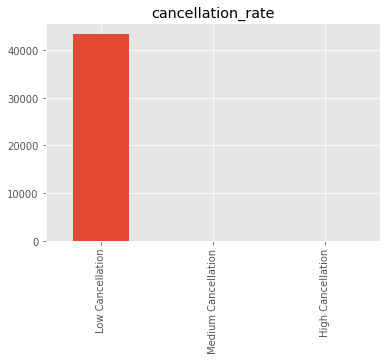

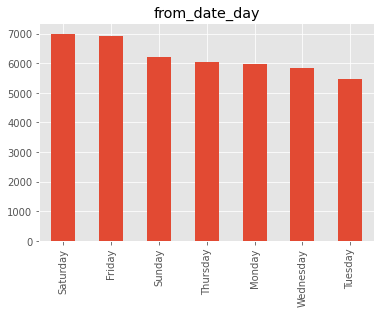

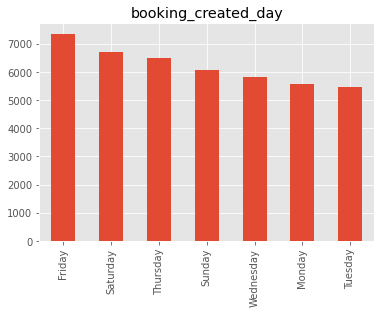

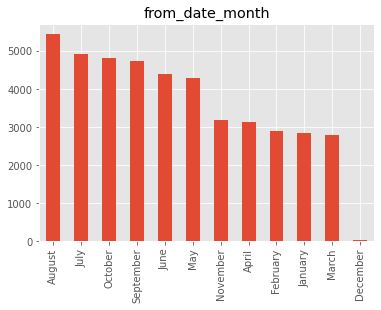

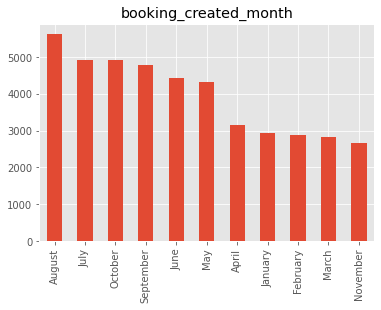

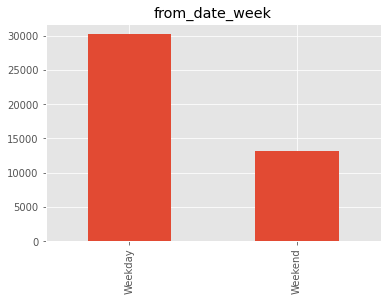

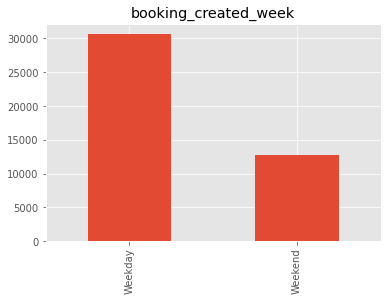

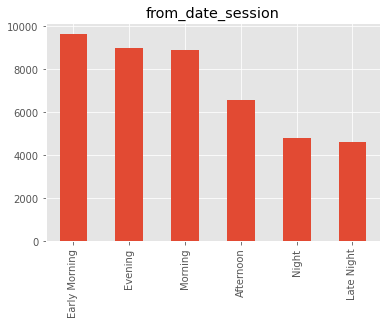

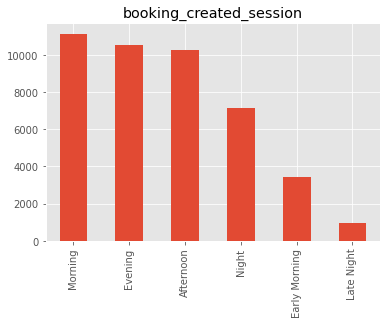

In [47]:
for col in data.columns:
  if data[col].dtype == 'object':
    data[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

In [48]:
merged_data = pd.concat([data,target], axis=1, join='inner')
char = merged_data.select_dtypes(include='object')

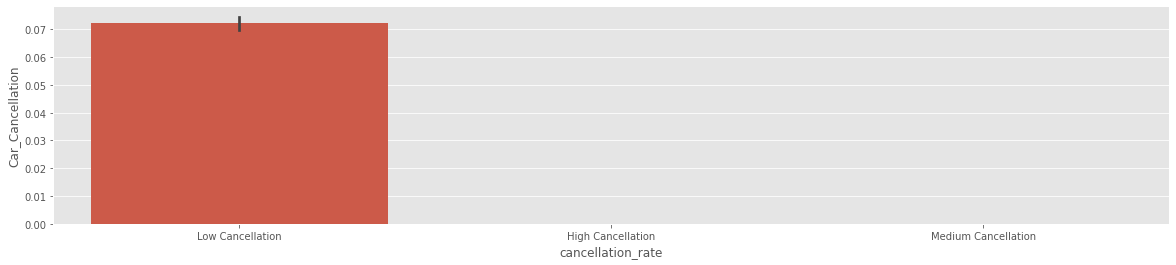

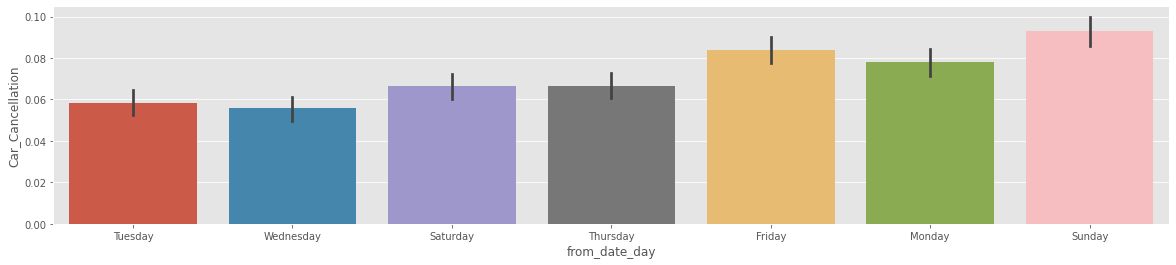

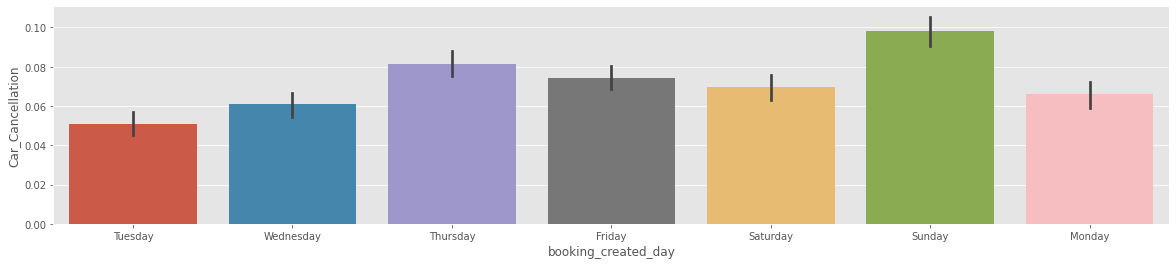

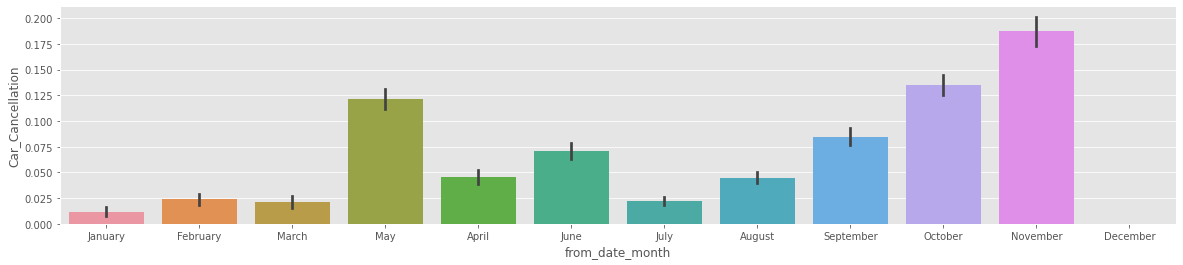

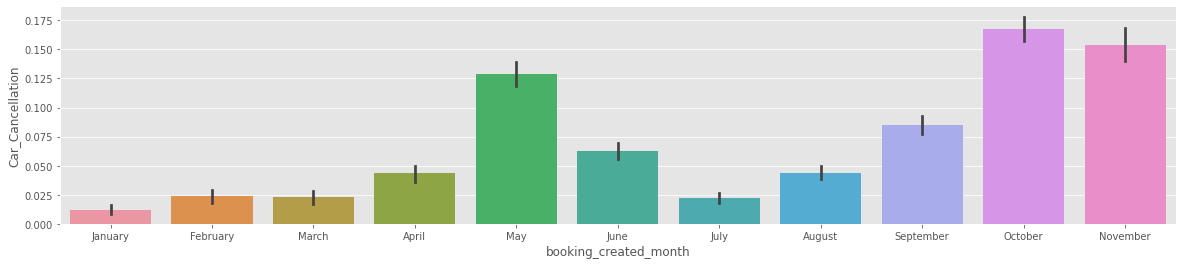

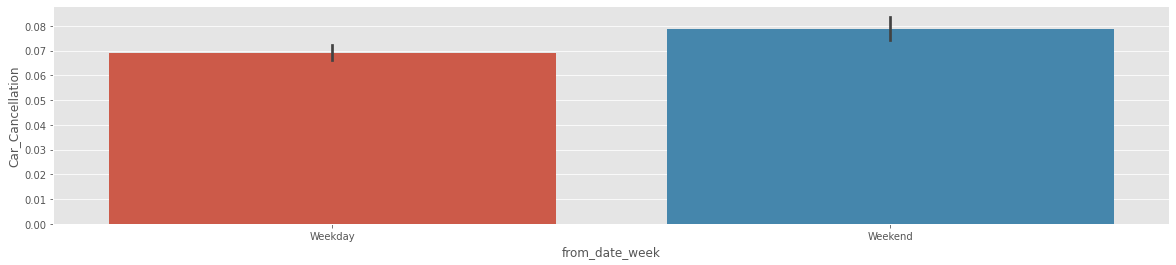

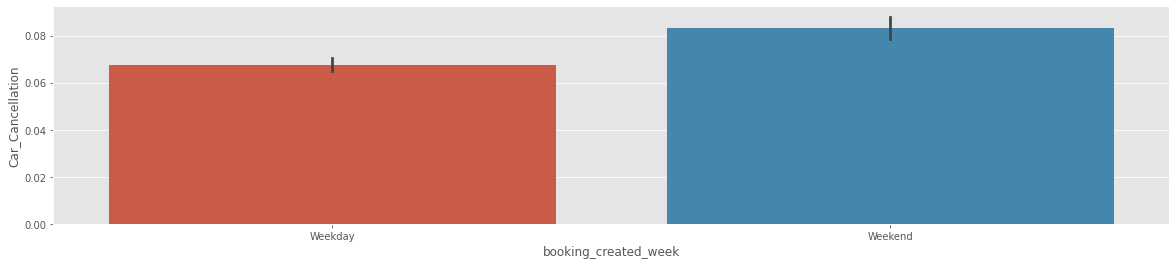

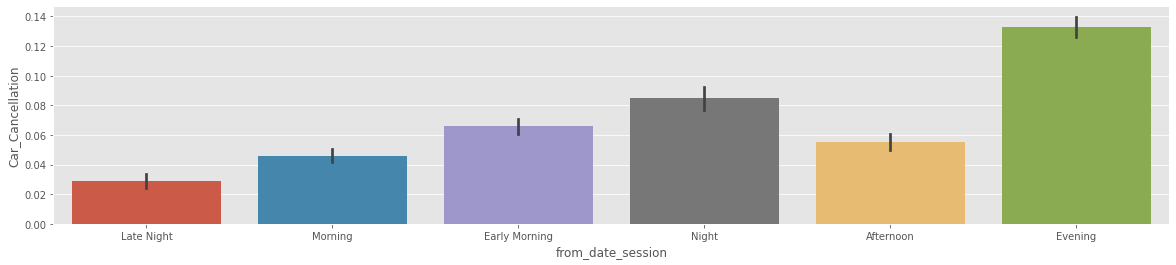

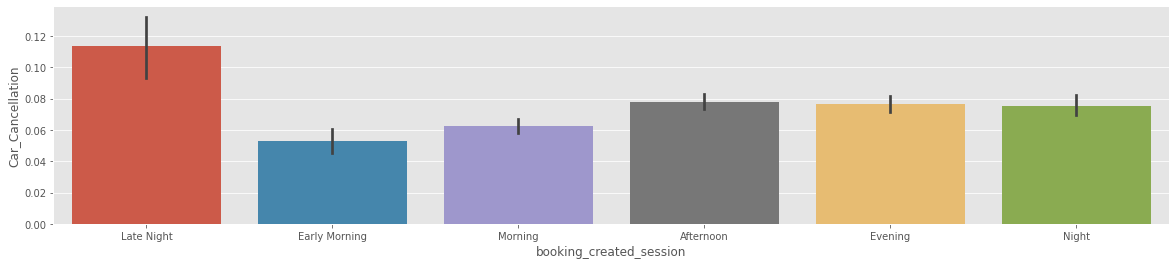

In [49]:
for col in (char.columns):
    plt.figure(figsize = (20,4))
    sns.barplot(x=col, y='Car_Cancellation', data=merged_data, estimator=np.mean)

In [50]:
data.head(3)

,travel_type_id,cancellation_rate,online_booking,mobile_site_booking,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,2,Low Cancellation,0,0,3.980687,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,21.0
1,2,Low Cancellation,0,0,14.004432,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night,395.0
2,2,Low Cancellation,0,0,12.648909,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,22.0


# Data Encoding

Convert Categorical Variables to Numeric using Label Encoder

In [51]:
# Function to convert categorical variables to numeric using preprocessing.LabelEncoder()

def preprocessor(df1):
    res_df = df1.copy()
    le = preprocessing.LabelEncoder()
    
    # Pass only Categorical / String column names here
    res_df['cancellation_rate'] = le.fit_transform(res_df['cancellation_rate'])
    res_df['from_date_day'] = le.fit_transform(res_df['from_date_day'])
    res_df['booking_created_day'] = le.fit_transform(res_df['booking_created_day'])
    res_df['from_date_month'] = le.fit_transform(res_df['from_date_month'])
    res_df['booking_created_month'] = le.fit_transform(res_df['booking_created_month'])
    res_df['from_date_week'] = le.fit_transform(res_df['from_date_week'])
    res_df['booking_created_week'] = le.fit_transform(res_df['booking_created_week'])
    res_df['from_date_session'] = le.fit_transform(res_df['from_date_session'])
    res_df['booking_created_session'] = le.fit_transform(res_df['booking_created_session'])

    return res_df

In [52]:
encoded_df = preprocessor(data)
encoded_df

,travel_type_id,cancellation_rate,online_booking,mobile_site_booking,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,2,1,0,0,3.980687,5,5,4,3,0,0,3,3,21.0
1,2,1,0,0,14.004432,5,5,4,3,0,0,4,3,395.0
2,2,1,0,0,12.648909,5,5,4,3,0,0,3,3,22.0
3,2,1,0,0,9.534596,5,5,4,3,0,0,1,3,66.0
4,2,1,0,0,14.655467,5,5,4,3,0,0,4,1,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,2,1,1,0,10.681284,3,3,9,8,1,1,2,0,215.0
43427,2,1,1,0,21.251031,5,3,9,8,0,1,3,0,2070.0
43428,3,1,0,0,7.450810,3,3,9,8,1,1,2,0,235.0
43429,2,1,0,0,4.584142,3,3,9,8,1,1,0,0,77.0


# Correlation Check

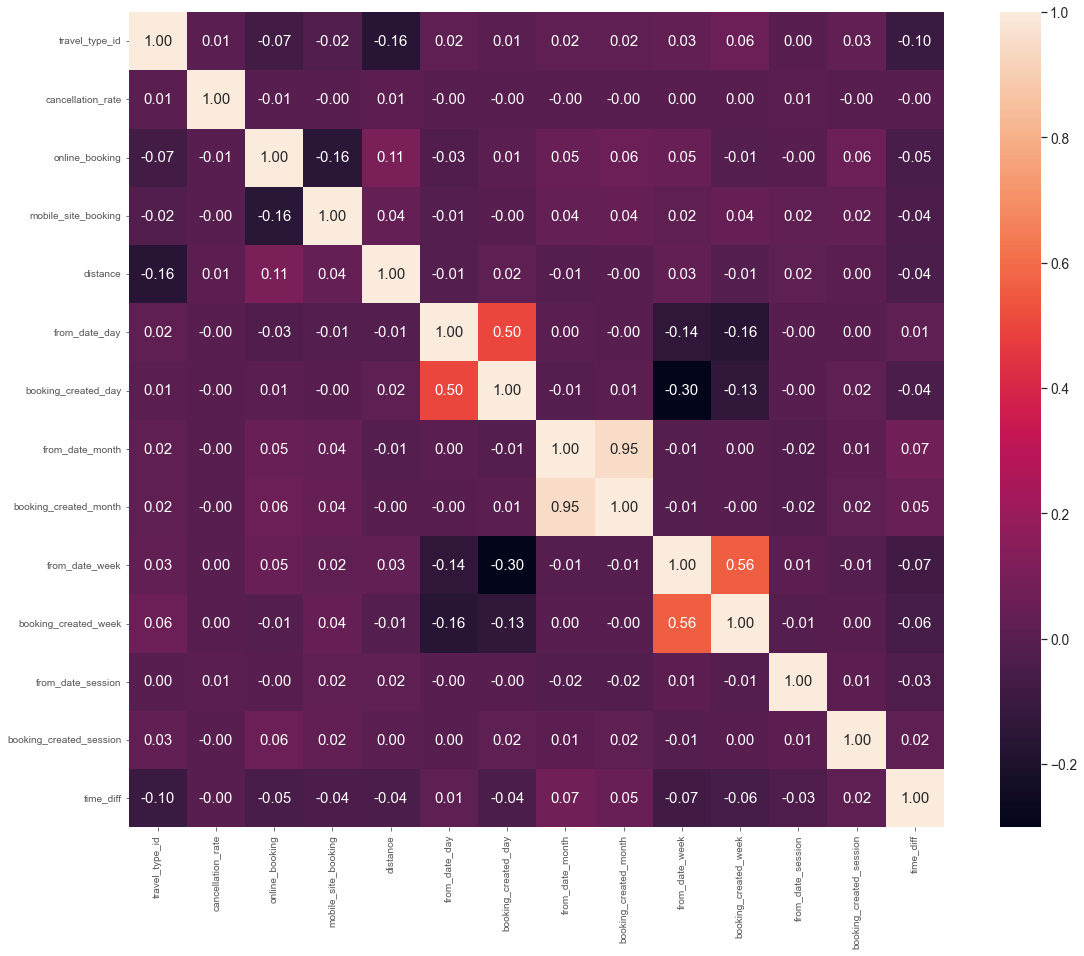

In [53]:
# Create Correlation Matrix
corrmat = encoded_df.corr()
cols = corrmat.columns

# Correlation Matrix
cm = np.corrcoef(encoded_df[cols].values.T)
f, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=1.25)

# Plot the Heatmap
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels=cols.values, xticklabels=cols.values)

# Insights: None of the columns are strongly correlated

In [54]:
# Drop booking_created_month as it has strong positive correlation with from_date_month
encoded_df = encoded_df.drop(['booking_created_month'], axis = 1)

# Feature Scaling / Standardization

In [55]:
cols = list(encoded_df.columns)

#standardize the data to normal distribution
dataset1_standardized = preprocessing.scale(encoded_df)
encoded_df1 = pd.DataFrame(dataset1_standardized, columns = cols)    # encoded_df1 is the dataset without the target variable
encoded_df1.head()

,travel_type_id,cancellation_rate,online_booking,mobile_site_booking,distance,from_date_day,booking_created_day,from_date_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,-0.313571,-0.007198,-0.736369,-0.212592,-1.194644,1.061077,1.053674,-0.560268,-0.660211,-0.645038,0.416200,0.287546,-0.356472
1,-0.313571,-0.007198,-0.736369,-0.212592,-0.209824,1.061077,1.053674,-0.560268,-0.660211,-0.645038,1.032118,0.287546,-0.290325
2,-0.313571,-0.007198,-0.736369,-0.212592,-0.343003,1.061077,1.053674,-0.560268,-0.660211,-0.645038,0.416200,0.287546,-0.356295
3,-0.313571,-0.007198,-0.736369,-0.212592,-0.648980,1.061077,1.053674,-0.560268,-0.660211,-0.645038,-0.815637,0.287546,-0.348513
4,-0.313571,-0.007198,-0.736369,-0.212592,-0.145861,1.061077,1.053674,-0.560268,-0.660211,-0.645038,1.032118,-0.810096,-0.348337


# Train Test Split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(encoded_df, target, test_size = 0.2, random_state=42)

In [57]:
# Creating copies of the original values
x_train1 = x_train.copy(deep=True) 
x_test1 = x_test.copy(deep=True) 
y_train1 = y_train.copy(deep=True) 
y_test1 = y_test.copy(deep=True) 

In [58]:
# Cleaning test sets to avoid future warning messages
y_train1 = y_train1.values.ravel() 
y_test1 = y_test1.values.ravel() 

# Function to plot Confusion Matrix

In [59]:
# Function to plot Confusion Matrix. Callable in future from all models

def create_conf_mat(ytest, pred, model_name):
    sns.set(rc = {'figure.figsize':(2,2)})
    if (len(ytest .shape) != len(pred.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (ytest .shape != pred.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = ytest, columns = pred)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
   
        sns.heatmap(test_crosstb, annot=True, fmt='d', cbar=False)
        plt.xlabel('Predicted Values')
        plt.ylabel('Actual Values')
        plt.title(model_name)
        plt.show()

# Function to plot Area Under Curve

In [60]:

# Function to plot AUC (Area Under Curve). Callable in future from all models

def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):

    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'dt': ['Decision Tree', 'darkgreen'],
              'nn': ['Neural Network', 'purple'],
              'svm':['Support Vector Machines', 'blue'],
              'log':['Logistic Regression', 'orange'],
              'nb' :['Naive Bayes Classifier', 'brown']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.2f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)                          # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

# Function to plot Classification Report

In [61]:
# Function to print Classification Report. Callable in future from all models

def print_class_report(predictions, y_t, target, alg_name):
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, y_t, target_names = target))

# -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

# Decision Tree Classifier

In [62]:
model_dt = DecisionTreeClassifier(random_state=42)

# Hyper-Parameter Optimization using GridSearchCV (Cross Validation)

In [63]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Automatically find the best parameters instead of manual hit and try

# np.random.seed(42)
# start = time.time()

# param_dist = {'max_depth': [5, 6, 7, 8, 9, 10, 12],
#               'max_features': ['auto', 'sqrt', 'log2', None],
#               'criterion': ['gini', 'entropy'],
#               'min_samples_split' : [3, 4, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
#               'min_samples_leaf' : [2, 4, 6, 8, 9, 10, 11, 12]}

# # n_jobs should be 1 less than number of CPU cores. -1 means all cores
# cv_dt = GridSearchCV(model_dt, cv = 20, param_grid=param_dist, n_jobs = -1)                 

# cv_dt.fit(x_train1, y_train1)
# print('Best Parameters using grid search: \n', cv_dt.best_params_)
# end = time.time()
# print('Time taken in grid search: {0: .2f}'.format(end - start))

# Decision Tree Classifier Model

In [64]:

# Set best parameters given by grid search CV
model_dt.set_params(max_depth=13 ,
                    criterion="gini", 
                    min_samples_split=13, 
                    min_samples_leaf=6, 
                    max_features = None)

model_dt.fit(x_train1, y_train1)

model_dt_score_train = model_dt.score(x_train1, y_train1)
print("Training score: ", model_dt_score_train)

model_dt_score_test = model_dt.score(x_test1, y_test1)
print("Testing score: ",model_dt_score_test)

Training score:  0.9470124338015197
Testing score:  0.9300103603085069


# Predictions & Evaluations (AUC, Confusion Matrix & Classification Report)

In [65]:
y_pred_dt = model_dt.predict(x_test)            # Actual Predictions

In [66]:
accuracy_dt = metrics.accuracy_score(y_test, y_pred_dt)
Precision_dt = metrics.precision_score(y_test, y_pred_dt,average='weighted')
recall_dt = metrics.recall_score(y_test, y_pred_dt,average='weighted')

print("Accuracy:",accuracy_dt)
print("Precision (Weighted Average):",Precision_dt)
print("Recall (Weighted Average):",recall_dt)

Accuracy: 0.9300103603085069
Precision (Weighted Average): 0.9180305789657409
Recall (Weighted Average): 0.9300103603085069


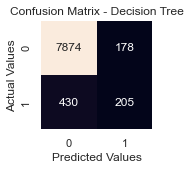

In [67]:
# Call Confusion Matrix Plotting function
# print(confusion_matrix(y_test, predictions))  
create_conf_mat(y_test1, y_pred_dt, "Confusion Matrix - Decision Tree")

In [68]:
# Calculate Performance Metrics
fpr_dt, tpr_dt, _ = roc_curve(y_test1, y_pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)

In [69]:
# Calculate Accuracy and Error Rate

test_error_rate_dt = 1 - model_dt_score_test

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(model_dt_score_test))
print("\nThe test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_dt))

Here is our mean accuracy on the test set:
 0.930

The test error rate for our model is:
  0.0700


In [70]:
class_report = print_class_report(y_test, y_pred_dt, ['Not Cancelled', 'Cancelled'], 'Decision Tree')

Classification Report for Decision Tree:
               precision    recall  f1-score   support

Not Cancelled       0.95      0.98      0.96      8052
    Cancelled       0.54      0.32      0.40       635

     accuracy                           0.93      8687
    macro avg       0.74      0.65      0.68      8687
 weighted avg       0.92      0.93      0.92      8687



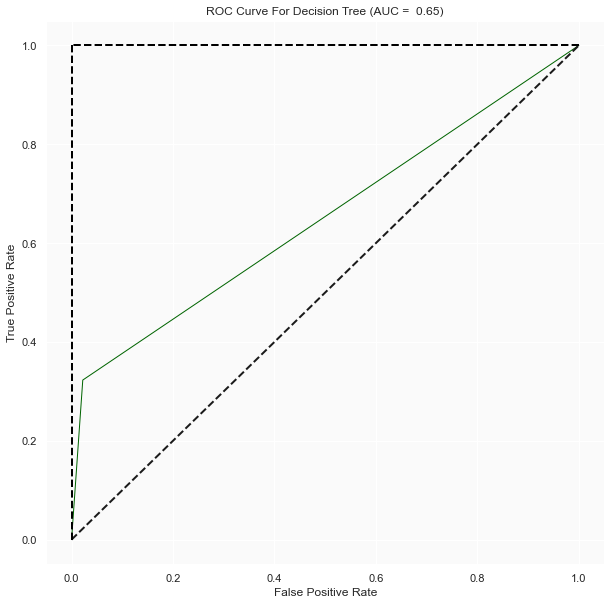

In [71]:
# Call function to plot Area Under Curve (AUC)
plot_roc_curve(fpr_dt, tpr_dt, auc_dt, 'dt')

# -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

# Random Forest Classifier

In [72]:
# Random Forest Classifier: Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

# Hyper-Parameter Optimization using GridSearchCV (Cross Validation)

In [73]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Automatically find the best parameters instead of manual hit and try

# np.random.seed(42)
# start = time.time()

# param_dist = {'max_depth': [12, 13, 14, 15],
#               'n_estimators':[120,130,140,150],
#               'bootstrap': [True, False],
#               'oob_score': [True, False],
#               'max_features': ['auto', None],
#               'criterion': ['gini', 'entropy'],
#               'min_samples_split' : [3,4,5,6],
#               'min_samples_leaf' : [2,3,4,5]}

# # Here we can add 'n_estimator' : [400, 500, 600...], 'min_samples_split' : [5, 10, 15, 20, 30], 
# # 'min_samples_leaf' : [2, 3, 4, 5, 7] but that will consume lot of resources and increase computational time
# # Hence calculate OOB Error Rate and manually put the n_estimator value later
# cv_rf = GridSearchCV(fit_rf, cv = 10,
#                      param_grid=param_dist, 
#                      n_jobs = -1)                 # n_jobs should be 1 less than number of CPU cores. -1 means all cores

# cv_rf.fit(x_train1, y_train1)
# print('Best Parameters using grid search: \n', cv_rf.best_params_)
# end = time.time()
# print('Time taken in grid search: {0: .2f}'.format(end - start))

# # Insight: Best Parameters: 
# # 'bootstrap':True, 'criterion':'gini', 'max_depth':4, 'max_features':'auto', 'min_samples_leaf':2, 'min_samples_split':3

In [74]:
# Set best parameters given by grid search 
fit_rf.set_params(max_depth=13, 
                  criterion="gini", 
                  min_samples_split=13, 
                  bootstrap = True,
                  min_samples_leaf=6, 
                  max_features = None)

RandomForestClassifier(max_depth=13, max_features=None, min_samples_leaf=6,
                       min_samples_split=13, random_state=42)

# OOB (Out of Bag) Error Rate

In [75]:
# fit_rf.set_params(warm_start=False, oob_score=True)
 
# min_estimators = 100
# max_estimators = 300

# error_rate = {}

# for i in range(min_estimators, max_estimators + 1):
#     fit_rf.set_params(n_estimators=i)
#     fit_rf.fit(x_train1, y_train1)

#     oob_error = 1 - fit_rf.oob_score_
#     error_rate[i] = oob_error
    
# # Convert dictionary to a pandas series for easy plotting 
# oob_series = pd.Series(error_rate)
    
# # Insights: Stable n_estimator is found to be around 139 from the OOB plot

# fig, ax = plt.subplots(figsize=(10, 10))

# ax.set_facecolor('#fafafa')

# oob_series.plot(kind='line',color = 'red')
# plt.xlabel('n_estimators')
# plt.ylabel('OOB Error Rate')
# plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1500 trees)')

In [76]:
# print('OOB Error rate for 650 trees is: {0:.5f}'.format(oob_series[36]))

In [77]:
# Refine the tree via OOB Output for n_estimators and grid search CV
# n_estimators is the number of trees we want to build before taking the maximum voting or averages of predictions
fit_rf.set_params(max_depth=13, 
                  criterion="gini", 
                  min_samples_split=13, 
                  min_samples_leaf=6, 
                  max_features = None,
                  n_estimators=178,
                  bootstrap = False,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=False, max_depth=13, max_features=None,
                       min_samples_leaf=6, min_samples_split=13,
                       n_estimators=178, random_state=42)

In [78]:
# Train the Random Forest
fit_rf.fit(x_train1, y_train1)

RandomForestClassifier(bootstrap=False, max_depth=13, max_features=None,
                       min_samples_leaf=6, min_samples_split=13,
                       n_estimators=178, random_state=42)

# Predictions & Evaluations (Confusion Matrix and Classification Report)

In [79]:
y_pred_rf = fit_rf.predict(x_test1)

In [80]:
accuracy_rf = metrics.accuracy_score(y_test1, y_pred_rf)
Precision_rf = metrics.precision_score(y_test1, y_pred_rf,average='weighted')
recall_rf = metrics.recall_score(y_test1, y_pred_rf,average='weighted')

print("Accuracy:",accuracy_rf)
print("Precision (Weighted Average):",Precision_rf)
print("Recall (Weighted Average):",recall_rf)

Accuracy: 0.9302405893864395
Precision (Weighted Average): 0.9181621835568453
Recall (Weighted Average): 0.9302405893864395


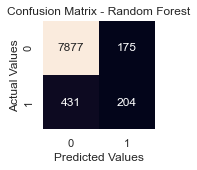

In [81]:
# Call Confusion Matrix Plotting function
create_conf_mat(y_test1, y_pred_rf, "Confusion Matrix - Random Forest")

# Accuracy & Error Rate

In [82]:
# Calculate Accuracy and Error Rate

accuracy_rf = fit_rf.score(x_test1, y_test1)
test_error_rate_rf = 1 - accuracy_rf

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))
print("\nThe test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

Here is our mean accuracy on the test set:
 0.930

The test error rate for our model is:
  0.0698


# Area Under Curve (AUC)

In [83]:
# We grab the second array from the output which corresponds to
# the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class

predictions_prob = fit_rf.predict_proba(x_test1)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test1, predictions_prob, pos_label = 1)

In [84]:
auc_rf = auc(fpr2, tpr2)

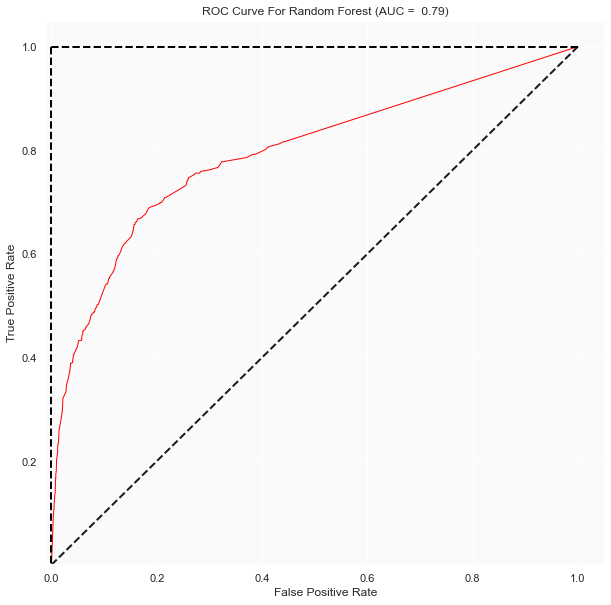

In [85]:
# Call function to plot Area Under Curve (AUC)
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf', xlim=(-0.01, 1.05), ylim=(0.001, 1.05))

In [86]:
# Call functiont to print Classification Report
class_report = print_class_report(y_pred_rf, y_test1, ['Not Cancelled', 'Cancelled'], 'Random Forest')

Classification Report for Random Forest:
               precision    recall  f1-score   support

Not Cancelled       0.98      0.95      0.96      8308
    Cancelled       0.32      0.54      0.40       379

     accuracy                           0.93      8687
    macro avg       0.65      0.74      0.68      8687
 weighted avg       0.95      0.93      0.94      8687



# -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

# K Nearest Neighbor (KNN)

# Detection of Optimal Value for K Neighnours

In [87]:
# error = []

# # Calculating error for K values between 1 and 40
# for i in range(1, 250):  
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(x_train1, y_train1)
#     pred_i = knn.predict(x_test1)
#     error.append(np.mean(pred_i != y_test1))
    
# plt.figure(figsize=(16, 6))  
# plt.plot(range(1, 250), error, color='red', linestyle='dashed', marker='o',  
#          markerfacecolor='blue', markersize=8)
# plt.title('Error Rate K Value')  
# plt.xlabel('K Value')  
# plt.ylabel('Mean Error')  
# plt.show()

# # Insights: The value of K for highest accuracy is 80

# K-Nearest Neighbours Classifier

In [88]:
# In the Detection of Optimal Value for K Neighnours plot 76 shows stable result

classifier = KNeighborsClassifier(n_neighbors=81)
classifier.fit(x_train1, y_train1)  

KNeighborsClassifier(n_neighbors=81)

# Predictions & Evaluations (Confusion Matrix and Classification Report)

In [89]:
y_pred_knn = classifier.predict(x_test1)

In [90]:
accuracy_knn = metrics.accuracy_score(y_test1, y_pred_knn)
Precision_knn = metrics.precision_score(y_test1, y_pred_knn,average='weighted')
recall_knn = metrics.recall_score(y_test1, y_pred_knn,average='weighted')

print("Accuracy:",accuracy_knn)
print("Precision (Weighted Average):",Precision_knn)
print("Recall (Weighted Average):",recall_knn)

Accuracy: 0.9269022677564176
Precision (Weighted Average): 0.8591478139719897
Recall (Weighted Average): 0.9269022677564176


In [91]:
# We grab the second array from the output which corresponds to
# the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class

pred_prob = classifier.predict_proba(x_test1)[:, 1]
fpr3, tpr3, _ = roc_curve(y_test1, pred_prob, pos_label = 1)

# Accuracy and Error Rate

In [92]:
# Calculate Accuracy and Error Rate

accuracy_knn = classifier.score(x_test1, y_test1)
test_error_rate_knn = 1 - accuracy_knn

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_knn))
print("\nThe test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_knn))

Here is our mean accuracy on the test set:
 0.927

The test error rate for our model is:
  0.0731


In [93]:
model_knn_score_train = classifier.score(x_train1, y_train1)
print("Training score: ", model_knn_score_train)

model_knn_score_test = classifier.score(x_test1, y_test1)
print("Testing score: ",model_knn_score_test)

Training score:  0.9281602578862538
Testing score:  0.9269022677564176


In [94]:
auc_knn = auc(fpr3, tpr3)

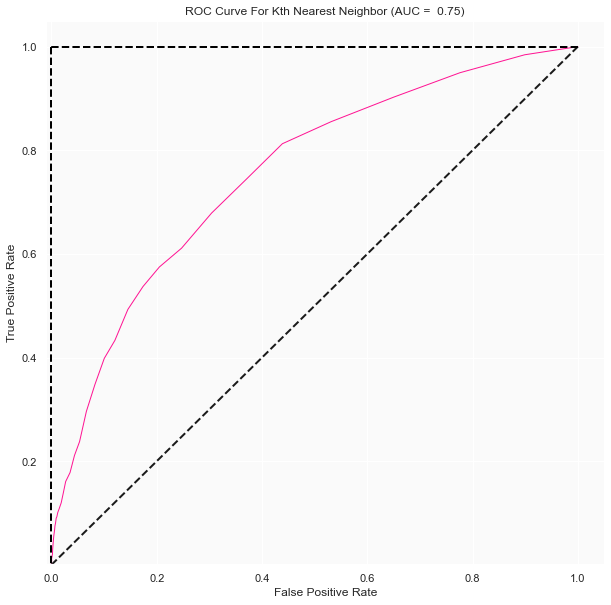

In [95]:
# Call function to plot Area Under Curve (AUC)
plot_roc_curve(fpr3, tpr3, auc_knn, 'knn', xlim=(-0.01, 1.05), ylim=(0.001, 1.05))

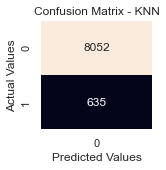

In [96]:
# Call function to plot Confusion Matrix
# print(confusion_matrix(y_test, y_pred_knn))  
conf_mat = create_conf_mat(y_test1, y_pred_knn, "Confusion Matrix - KNN")

In [97]:
print("Accuracy:", metrics.accuracy_score(y_test1, y_pred_knn))
print("Precision", metrics.precision_score(y_test1, y_pred_knn))
print("Recall", metrics.recall_score(y_test1, y_pred_knn))
print("f1_score", metrics.f1_score(y_test1, y_pred_knn))

Accuracy: 0.9269022677564176
Precision 0.0
Recall 0.0
f1_score 0.0


In [98]:
# Print Classification Report:

class_report = print_class_report(y_pred_knn, y_test1, ['Not Cancelled', 'Cancelled'], 'K Nearest Neighbor')
# f1 Score = 2 * (precision * recall)/ (precision + recall) ie how good my model is in predicting 1 as 1 and 0 as 0

Classification Report for K Nearest Neighbor:
               precision    recall  f1-score   support

Not Cancelled       1.00      0.93      0.96      8687
    Cancelled       0.00      0.00      0.00         0

     accuracy                           0.93      8687
    macro avg       0.50      0.46      0.48      8687
 weighted avg       1.00      0.93      0.96      8687



Insights: K-Nearest Neighbors is not fit for this dataset as it is unable to predict True Positives and hence f1-Score is 0

# -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

# Support Vector Machines (SVM)

Model training takes extremely long time and performance is lower than Random Forest. Henct this is not a preferred model for this dataset

# Kernel Parameter

In [99]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards

# # Linear Kernel:
# svc=SVC(kernel='linear')
# svc.fit(x_train1,y_train1)
# y_pred_svm=svc.predict(x_test1)
# print('\nAccuracy Score for Linear Kernel: ', metrics.accuracy_score(y_test1,y_pred_svm))

# # Polynomial Kernel:
# svc=SVC(kernel='poly')
# svc.fit(x_train1,y_train1)
# y_pred_svm=svc.predict(x_test1)
# print('Accuracy Score for Polynomial Kernel: ', metrics.accuracy_score(y_test1,y_pred_svm))

# # rbf Kernel:
# svc=SVC(kernel='rbf')
# svc.fit(x_train1,y_train1)
# y_pred_svm=svc.predict(x_test1)
# print('Accuracy Score for rbf Kernel: ', metrics.accuracy_score(y_test1,y_pred_svm))

# # sigmoid Kernel:
# svc=SVC(kernel='sigmoid')
# svc.fit(x_train1,y_train1)
# y_pred_svm=svc.predict(x_test1)
# print('Accuracy Score for sigmoid Kernel: ', metrics.accuracy_score(y_test1,y_pred_svm))

# # Insights: 'Linear' kernel gives the best accuracy

# Optimizing Hyper Parameter C

In [100]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Optimizing the HyperParameter C

# C_range=list(range(1,10,1))
# acc_score=[]
# for c in C_range:
#     svc = SVC(kernel='rbf', C=c)
#     scores = cross_val_score(svc, encoded_df, target, cv=5, scoring='accuracy', n_jobs = -1)
#     acc_score.append(scores.mean())
# print(acc_score)
# ind = acc_score.index(max(acc_score))
# print("\nOptimal Integer Value of C ~", C_range[ind])

# # plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)

# C_values=list(range(1,10))
# plt.figure(figsize = (20,6))
# plt.plot(C_values,acc_score)
# plt.xticks(np.arange(0,12,2))
# plt.xlabel('Value of C for SVC')
# plt.ylabel('Cross-Validated Accuracy')

# # Optimal Integer Value of C ~ 2

In [101]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Find the exact value of C up to 1 place of decimal

# C_range=list(np.arange(1,3,0.1))
# acc_score=[]
# for c in C_range:
#     svc = SVC(kernel='linear', C=c)
#     scores = cross_val_score(svc, encoded_df, target, cv=10, scoring='accuracy', n_jobs = -1)
#     acc_score.append(scores.mean())
# #print(acc_score)    


# # plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)

# C_values=list(np.arange(0,4,0.1))
# plt.figure(figsize = (20,6))
# plt.plot(C_values,acc_score)
# plt.xticks(np.arange(0,4,0.2))
# plt.xlabel('Value of C for SVC ')
# plt.ylabel('Cross-Validated Accuracy')

# # Insights: Optimal Vaue of C = 0.2

# Optimizing Hyper Parameter Gamma

In [102]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Optimizing the HyperParameter Gamma

# gamma_range=[0.0001,0.001,0.01,0.1,1,5,10]
# acc_score=[]
# for g in gamma_range:
#     svc = SVC(kernel='rbf', gamma=g)
#     scores = cross_val_score(svc, encoded_df, target, cv=5, scoring='accuracy', n_jobs = -1)
#     acc_score.append(scores.mean())
# print(acc_score)  
# # Insights: Optimal Vaue of gamma = 1

# # plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)

# gamma_range=[0.0001,0.001,0.01,0.1,1,5,10]
# plt.figure(figsize = (20,6))
# plt.plot(gamma_range,acc_score)
# plt.xlabel('Value of gamma for SVC ')
# plt.xticks(np.arange(0,10,0.2))
# plt.ylabel('Cross-Validated Accuracy')

# Hyper-Parameter Optimization using GridSearchCV (Cross Validation)

In [103]:
# # Execute this code snippet only to find the optimal values of parameters. Comment it out afterwards
# # Automatically find the best parameters instead of manual hit and try

# svm_model= SVC()
# tuned_parameters = {'C': (np.arange(0,2,0.05)), 
#                     'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07], 
#                     'kernel':['rbf'], 
#                     'degree': [1, 2]}

# fit_svm = GridSearchCV(svm_model, tuned_parameters, cv=10, scoring='accuracy', n_jobs = -1)
# fit_svm.fit(x_train1, y_train1)
# print("Accuracy: ", fit_svm.best_score_)
# print("Parameters: ", fit_svm.best_params_)

# # Accuracy:  0.8891824526420737


# Support Vector Machine (SVM) Classifier

In [104]:
# svm_model= SVC(probability=True)
# tuned_parameters = {'C': [2] , 'kernel': ['linear'], 'gamma': [1], 'degree': [1]}

# fit_svm = GridSearchCV(svm_model, tuned_parameters, cv=2, scoring='accuracy', n_jobs = -1)
# fit_svm.fit(x_train1, y_train1)
# print("Accuracy: ", fit_svm.best_score_)
# print("Parameters: ", fit_svm.best_params_)

# Predictions & Evaluations (Confusion Matrix and Classification Report)

In [105]:
# y_pred_svm = fit_svm.predict(x_test1)

In [106]:
# accuracy_svm = metrics.accuracy_score(y_test1, y_pred_svm)
# Precision_svm = metrics.precision_score(y_test1, y_pred_svm,average='weighted')
# recall_svm = metrics.recall_score(y_test1, y_pred_svm,average='weighted')

# print("Accuracy:",accuracy_svm)
# print("Precision (Weighted Average):",Precision_svm)
# print("Recall (Weighted Average):",recall_svm)

In [107]:
# # Call function to plot Confusion Matrix
# # print(confusion_matrix(y_test, y_pred_svm))  
# conf_mat = create_conf_mat(y_test1, y_pred_svm, "Confusion Matrix - SVM")

# Accuracy and Error Rate

In [108]:
# # We grab the second array from the output which corresponds to
# # the predicted probabilites of positive classes 
# # Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class

# pred_prob = fit_svm.predict_proba(x_test1)[:, 1]
# fpr4, tpr4, _ = roc_curve(y_test1, pred_prob, pos_label = 1)

In [109]:
# # Calculate Accuracy and Error Rate

# accuracy_svm = fit_svm.score(x_test1, y_test1)
# test_error_rate_svm = 1 - accuracy_svm

# print("Here is our mean accuracy on the test set:\n {0:.3f}"\
#       .format(accuracy_svm))
# print("\nThe test error rate for our model is:\n {0: .4f}"\
#       .format(test_error_rate_svm))

In [110]:
# model_svm_score_train = fit_svm.score(x_train1, y_train1)
# print("Training score: ", model_svm_score_train)

# model_svm_score_test = fit_svm.score(x_test1, y_test1)
# print("Testing score: ",model_svm_score_test)

# Area Under Curve (AUC)

In [111]:
# auc_svm = auc(fpr4, tpr4)

In [112]:
# # Call function to plot Area Under Curve (AUC)
# plot_roc_curve(fpr4, tpr4, auc_svm, 'svm', xlim=(-0.01, 1.05), ylim=(0.001, 1.05))

In [113]:
# # Print Classification Report:

# class_report = print_class_report(y_pred_svm, y_test1, ['Not Cancelled', 'Cancelled'], 'Support Vector Machines')
# # f1 Score = 2 * (precision * recall)/ (precision + recall) ie how good my model is in predicting 1 as 1 and 0 as 0

# -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

# Logistic Regression Classifier

In [114]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train1,y_train1)

LogisticRegression()

# Predictions & Evaluations (Confusion Matrix and Classification Report)

In [115]:
y_pred_log=logreg.predict(x_test1)

In [116]:
accuracy_log = metrics.accuracy_score(y_test1, y_pred_log)
Precision_log = metrics.precision_score(y_test1, y_pred_log,average='weighted')
recall_log = metrics.recall_score(y_test1, y_pred_log,average='weighted')

print("Accuracy:",accuracy_log)
print("Precision (Weighted Average):",Precision_log)
print("Recall (Weighted Average):",recall_log)

Accuracy: 0.9269022677564176
Precision (Weighted Average): 0.8591478139719897
Recall (Weighted Average): 0.9269022677564176


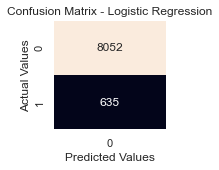

In [117]:
# Call function to plot Confusion Matrix
# print(confusion_matrix(y_test, y_pred_log))  
conf_mat_log = create_conf_mat(y_test1, y_pred_log, "Confusion Matrix - Logistic Regression")

# Accuracy & Error Rate

In [118]:
accuracy_log = metrics.accuracy_score(y_test1, y_pred_log)
Precision_log = metrics.precision_score(y_test1, y_pred_log)
recall_log = metrics.recall_score(y_test1, y_pred_log)

print("Accuracy:",accuracy_log)
print("Precision:",Precision_log)
print("Recall:",recall_log)

Accuracy: 0.9269022677564176
Precision: 0.0
Recall: 0.0


In [119]:
model_log_score_train = logreg.score(x_train1, y_train1)
print("Training score: ", model_log_score_train)

model_log_score_test = logreg.score(x_test1, y_test1)
print("Testing score: ",model_log_score_test)

Training score:  0.9280163481464425
Testing score:  0.9269022677564176


# Area Under Curve (AUC)

In [120]:
y_pred_proba_log = logreg.predict_proba(x_test1)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test1,  y_pred_proba_log)
auc_log = metrics.roc_auc_score(y_test1, y_pred_proba_log)

In [121]:
auc_log = auc(fpr5, tpr5)

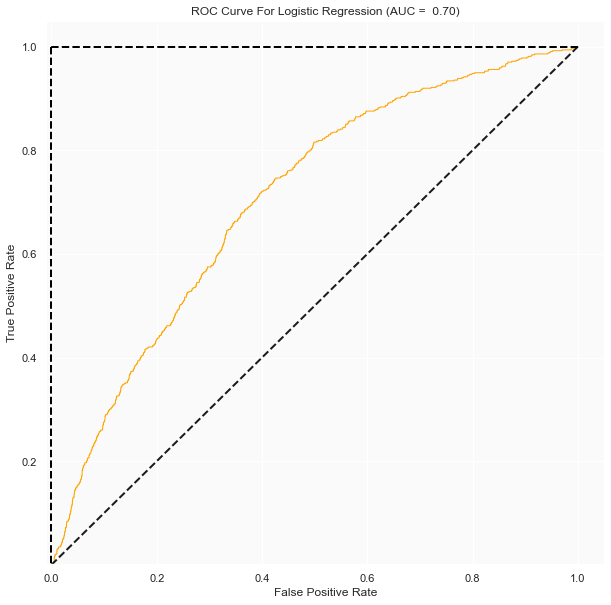

In [122]:
# Call function to plot Area Under Curve (AUC)
plot_roc_curve(fpr5, tpr5, auc_log, 'log', xlim=(-0.01, 1.05), ylim=(0.001, 1.05))

In [123]:

# Print Classification Report:

class_report = print_class_report(y_pred_log, y_test1, ['Not Cancelled', 'Cancelled'], 'Logistic Regression')
# f1 Score = 2 * (precision * recall)/ (precision + recall) ie how good my model is in predicting 1 as 1 and 0 as 0

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

Not Cancelled       1.00      0.93      0.96      8687
    Cancelled       0.00      0.00      0.00         0

     accuracy                           0.93      8687
    macro avg       0.50      0.46      0.48      8687
 weighted avg       1.00      0.93      0.96      8687



Insights: Logistic Regression is not fit for this dataset as it is unable to predict True Positives and hence f1-Score is 0

# -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-